In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('D:/work_dir/Datasets/LoRa_anomaly-detection')
from RSSI_fingerprinting_TDoA_Estimation.performance_eval import *


In [47]:
r = pd.read_csv('position_estimation_comb.csv') 
# r = pd.read_csv('position_estimation_comb_gps_time.csv') 

In [48]:
r

,Unnamed: 0,timestamp,gw_ref,lat,lon,pred_lat,pred_lon,x,y,z,x_i,y_i,z_i,lat_est,lon_est
0,0,2019-02-04T11:22:01.648575881+01:00,7931,51.234604,4.409099,51.224994,4.412957,2684.951159,-2896.338966,-1.221992,2955.020693,-3965.327103,-1.916514,51.264690,4.407346
1,1,2019-01-18T08:06:49.058+01:00,127217,51.194065,4.418468,51.194066,4.418463,3342.303844,-7405.988767,-5.176262,3341.890460,-7405.904157,-5.175948,51.260590,4.419790
2,2,2018-12-31T08:49:13.832705509+01:00,84169,51.203846,4.389355,51.203825,4.389451,1306.879075,-6318.767105,-3.265466,1313.571538,-6321.141998,-3.269193,51.238093,6.687191
3,3,2019-01-10T08:00:55.928+01:00,85409,51.204754,4.390674,51.204315,4.391496,1399.031215,-6217.737233,-3.185625,1456.464575,-6266.526482,-3.246233,51.222901,7.657147
4,4,2019-01-15T07:52:29.583+01:00,73375,51.194294,4.419023,51.194265,4.418989,3381.020065,-7380.499872,-5.167063,3378.668886,-7383.726802,-5.169557,51.115615,-1.475807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16570,16570,2019-01-22T13:56:39.509+01:00,29367,51.233051,4.403012,51.233063,4.403044,2259.937900,-3069.272780,-1.138497,2262.148784,-3067.998620,-1.138665,51.260638,4.429226
16571,16571,2019-01-17T08:04:37.593+01:00,104475,51.205135,4.391699,51.204292,4.389243,1470.668503,-6175.277883,-3.160433,1299.054933,-6269.199965,-3.214929,51.236388,7.308967
16572,16572,2019-01-04T12:36:24.581662417+01:00,17565,51.223019,4.426466,51.223031,4.426480,3898.953011,-4184.448380,-2.562735,3899.911369,-4183.089588,-2.562428,50.900810,-4.518338
16573,16573,2019-01-06T20:43:48.567+01:00,79004,51.194542,4.418740,51.194528,4.418722,3361.235640,-7352.927348,-5.124762,3359.989997,-7354.455977,-5.125871,51.107745,10.347308


In [49]:
actual_pos = r[['lat', 'lon']].to_numpy()
pred_pos = r[['pred_lat', 'pred_lon']].to_numpy()    

error_stats(ground_truth=actual_pos, predictions=pred_pos)

263.30594798946737

In [50]:
r_copy = r.copy()

r_copy['lat_est'] = pd.to_numeric(r['lat_est'], errors='coerce')
r_copy['lon_est'] = pd.to_numeric(r['lon_est'], errors='coerce')

r_woNan = r_copy.dropna(subset=['lat_est'])


In [51]:
actual_pos_2 = r_woNan[['lat', 'lon']].to_numpy()
est_pos = r_woNan[['lat_est', 'lon_est']].to_numpy()    

error_stats(ground_truth=actual_pos_2, predictions=est_pos, statistical_metric='min_max')

(2.8900912538326713, 10012225.824993052)

In [52]:
estimation_error = calculate_pairwise_error_list(ground_truth=actual_pos_2, predictions=est_pos)

In [58]:
from numpy import mean, median


y = [x for x in estimation_error if x < 1000]

print(f'min {min(y)}')
print(f'max {max(y)}')
print(f'mean {mean(y)}')
print(f'median {median(y)}')

min 2.8900912538326713
max 946.1352873208743
mean 618.9512168034167
median 695.1689002043329


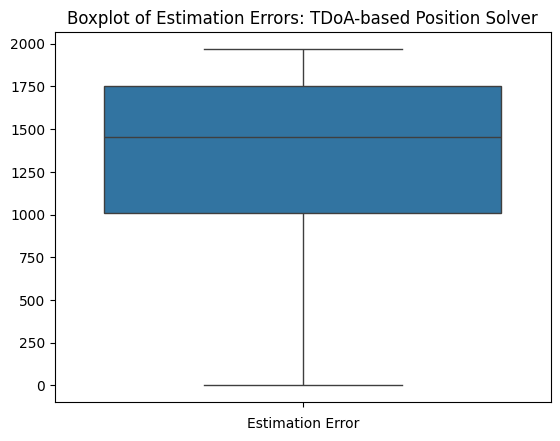

In [54]:
sns.boxplot([x for x in estimation_error if x < 2000])
plt.title('Boxplot of Estimation Errors: TDoA-based Position Solver') 
plt.xlabel('Estimation Error') 
plt.show()
# sns.boxplot(estimation_error)

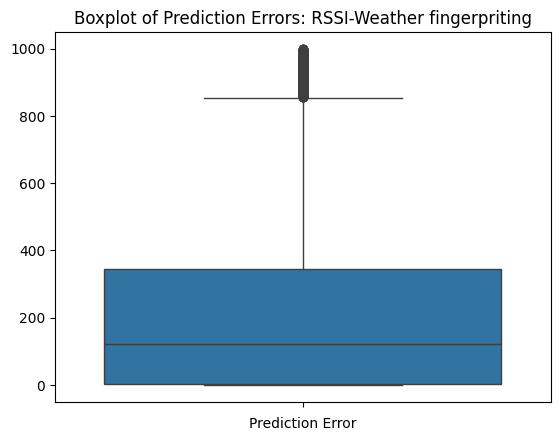

In [55]:
prediction_error = calculate_pairwise_error_list(actual_pos, pred_pos)
# sns.boxplot(prediction_error)
sns.boxplot([x for x in prediction_error if x < 1000])
plt.title('Boxplot of Prediction Errors: RSSI-Weather fingerpriting') 
plt.xlabel('Prediction Error') 
plt.show()

In [56]:
from numpy import mean, median


y = [x for x in prediction_error if x < 1000]

print(f'min {min(y)}')
print(f'max {max(y)}')
print(f'mean {mean(y)}')
print(f'median {median(y)}')

min 0.0
max 999.5715453218062
mean 209.55921402773762
median 120.83309244075807


In [57]:
r[r['gw_ref']==42]

,Unnamed: 0,timestamp,gw_ref,lat,lon,pred_lat,pred_lon,x,y,z,x_i,y_i,z_i,lat_est,lon_est
5606,5606,2019-01-04T08:57:14.910+01:00,42,51.208572,4.400587,51.209168,4.404269,2091.624955,-5792.683946,-2.974322,2348.924783,-5726.282375,-3.00371,51.193665,0.475954
